In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("data.csv")

In [7]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiBaseModel,ProductSize,...,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS
0,1139246,66000.0,999089,3157,121,3,2004,68,23557,4,...,0,0,0,0,1,0,1,0,0,0
1,1139248,57000.0,117657,77,121,3,1996,4640,46666,2,...,0,0,0,0,1,0,1,0,0,0
2,1139249,10000.0,434808,7009,121,3,2001,2838,12863,4,...,0,1,0,0,0,0,0,0,0,1
3,1139251,38500.0,1026470,332,121,3,2001,3486,30741,3,...,0,0,1,0,0,0,1,0,0,0
4,1139253,11000.0,1057373,17311,121,3,2007,722,11132,4,...,0,1,0,0,0,0,0,0,0,0


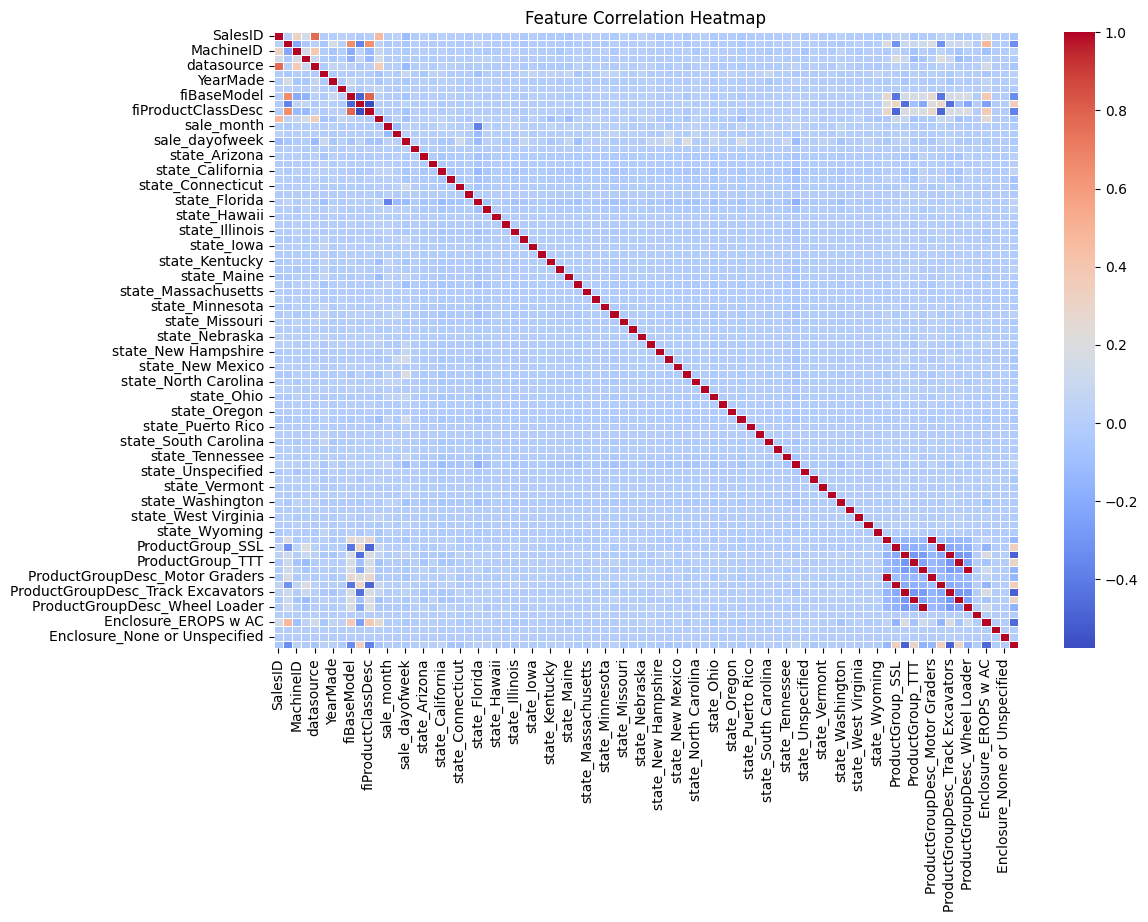

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [10]:
X

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiBaseModel,ProductSize,fiProductClassDesc,...,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS
0,1139246,999089,3157,121,3,2004,68,23557,4,36143,...,0,0,0,0,1,0,1,0,0,0
1,1139248,117657,77,121,3,1996,4640,46666,2,41176,...,0,0,0,0,1,0,1,0,0,0
2,1139249,434808,7009,121,3,2001,2838,12863,4,9797,...,0,1,0,0,0,0,0,0,0,1
3,1139251,1026470,332,121,3,2001,3486,30741,3,31291,...,0,0,1,0,0,0,1,0,0,0
4,1139253,1057373,17311,121,3,2007,722,11132,4,10089,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,1919201,21435,149,2,2005,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0
412694,6333345,1882122,21436,149,2,2005,0,23557,3,13755,...,0,0,1,0,0,0,0,0,0,0
412695,6333347,1944213,21435,149,2,2005,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0
412696,6333348,1794518,21435,149,2,2006,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0


In [11]:
y

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
412693    10000.0
412694    10500.0
412695    12500.0
412696    10000.0
412697    13000.0
Name: SalePrice, Length: 412698, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

In [14]:
y_train.shape

(330158,)

In [15]:
X_test.shape

(82540, 81)

In [16]:
y_test.shape

(82540,)

## Model Training

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, max_depth=10),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=50, max_depth=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=50, max_depth=5),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15438.0228
- Mean Absolute Error: 10928.9606
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.1493
- Mean Absolute Error: 10909.0833
- R2 Score: 0.5560


Lasso
Model performance for Training set
- Root Mean Squared Error: 15438.7587
- Mean Absolute Error: 10928.1701
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.5355
- Mean Absolute Error: 10907.9091
- R2 Score: 0.5559




C:\Users\Sushrutha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.55071e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge
Model performance for Training set
- Root Mean Squared Error: 15438.0280
- Mean Absolute Error: 10928.9616
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.1160
- Mean Absolute Error: 10909.0061
- R2 Score: 0.5560


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 15967.8576
- Mean Absolute Error: 11243.5358
- R2 Score: 0.5248
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15875.3012
- Mean Absolute Error: 11212.7496
- R2 Score: 0.5258




## Hyper parameter Tuning

In [ ]:
xg_params = {
    'n_estimators': [100, 500],  
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 5],  
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBRegressor(objective='reg:squarederror', random_state=42), xg_params),
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=10,
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random.fit(X_train, y_train)
# Store the best parameters
model_param[model_name] = random.best_params_
# Print the best parameters
print(f"---------------- Best Params for {model_name} -------------------")
print(model_param[model_name])